In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

os.listdir("/content/drive/MyDrive/garbage_classification_2")
path = "/content/drive/MyDrive/garbage_classification_2/"

data = pd.DataFrame()

for category in os.listdir(path):
    temp = pd.DataFrame()
    temp['path'] = np.nan
    temp['target'] = category
    i = 0
    for photo in os.listdir(path+category):
        temp.loc[i, 'path'] = path+category+ "/" + photo
        temp.loc[i, 'filename'] = category+ "/" + photo
        temp.loc[i, 'target'] = category
        i += 1
    data = pd.concat([data, temp], ignore_index=True)
    del temp
    
print(len(data))

Mounted at /content/drive
7200


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,                               
    horizontal_flip=True)

train=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=path,
    x_col='filename',
    y_col='target',
    target_size=(256,256),
    batch_size=32,
    class_mode ='categorical')

test=train_datagen.flow_from_dataframe(
    dataframe=test,
    directory=path,
    x_col='filename',
    y_col='target',
    target_size=(256,256),
    batch_size=32,
    class_mode ='categorical')

Found 5040 validated image filenames belonging to 12 classes.
Found 2160 validated image filenames belonging to 12 classes.


In [ ]:
from keras.models import Sequential
model=Sequential()

#model CNN
# input
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
# output
model.add(Dense(12,activation='Softmax'))

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

In [ ]:
history=model.fit(
    train,
    steps_per_epoch=len(train),
    batch_size = 32,
    epochs=50,
    validation_data=test,
    validation_steps=len(test),
    callbacks=callbacks,
    verbose = 1)

Epoch 1/50
158/158 [==============================] - 3680s 23s/step - loss: 2.3834 - accuracy: 0.2095 - val_loss: 2.0607 - val_accuracy: 0.2750
Epoch 2/50
158/158 [==============================] - 112s 706ms/step - loss: 1.8366 - accuracy: 0.3665 - val_loss: 1.7797 - val_accuracy: 0.4176
Epoch 3/50
158/158 [==============================] - 112s 707ms/step - loss: 1.6669 - accuracy: 0.4331 - val_loss: 1.5367 - val_accuracy: 0.4417
Epoch 4/50
158/158 [==============================] - 111s 705ms/step - loss: 1.4814 - accuracy: 0.4956 - val_loss: 1.6113 - val_accuracy: 0.4500
Epoch 5/50
158/158 [==============================] - 112s 708ms/step - loss: 1.3971 - accuracy: 0.5224 - val_loss: 1.4555 - val_accuracy: 0.5125
Epoch 6/50
158/158 [==============================] - 111s 706ms/step - loss: 1.3042 - accuracy: 0.5603 - val_loss: 1.5648 - val_accuracy: 0.5125
Epoch 7/50
158/158 [==============================] - 110s 699ms/step - loss: 1.1938 - accuracy: 0.6063 - val_loss: 1.2916 - 

In [ ]:
model.save('Garbage_Classification_test5.h5')

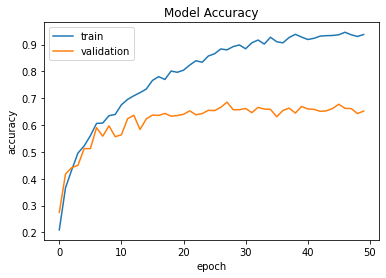

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

In [ ]:
from keras.models import load_model
model = load_model('Garbage_Classification_test5.h5')

In [ ]:
# Dat ten cho cac classes
classes = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes','green-glass', 
           'metal', 'paper', 'plastic', 'shoes','trash','white-glass']

Kết quả dự đoán:
white-glass


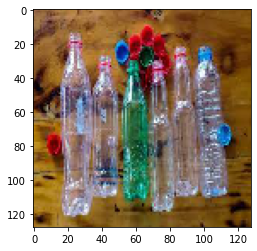

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

img = load_img('chai2.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print("Kết quả dự đoán:")
print(classes[np.argmax(model.predict(img))])